## Data Preprocessing

In [44]:
#importing the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# from imblearn.over_sampling import SMOTE


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

### basic data inspection

In [4]:
# data discovering
df = pd.read_csv("../data/MIT-BIH Arrhythmia Database.csv")
print(f"Data set Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(f"Target classes: {df["type"].value_counts()}")

Data set Shape: (100689, 34)
Columns: ['record', 'type', '0_pre-RR', '0_post-RR', '0_pPeak', '0_tPeak', '0_rPeak', '0_sPeak', '0_qPeak', '0_qrs_interval', '0_pq_interval', '0_qt_interval', '0_st_interval', '0_qrs_morph0', '0_qrs_morph1', '0_qrs_morph2', '0_qrs_morph3', '0_qrs_morph4', '1_pre-RR', '1_post-RR', '1_pPeak', '1_tPeak', '1_rPeak', '1_sPeak', '1_qPeak', '1_qrs_interval', '1_pq_interval', '1_qt_interval', '1_st_interval', '1_qrs_morph0', '1_qrs_morph1', '1_qrs_morph2', '1_qrs_morph3', '1_qrs_morph4']
Target classes: type
N       90083
VEB      7009
SVEB     2779
F         803
Q          15
Name: count, dtype: int64


In [5]:
df.head()

,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,101,N,76,313.0,0.074347,-0.160548,1.036401,-0.285662,-0.026824,41,...,0.025930,2,18,22,2,0.025930,0.025930,0.025930,0.025436,0.025436
1,101,N,313,315.0,-0.052079,-0.264784,0.886597,-0.366298,-0.059710,21,...,-0.042009,26,27,62,9,-0.042009,-0.029498,0.005012,0.030892,0.002986
2,101,N,315,321.0,-0.062151,-0.296983,0.991859,-0.410306,-0.065686,22,...,0.009528,3,8,12,1,0.009528,0.009528,0.008786,0.008786,0.008368
3,101,N,321,336.0,-0.063322,-0.281386,1.034903,-0.403880,-0.071750,22,...,-0.020536,6,9,16,1,-0.020536,-0.020257,-0.018965,-0.016968,-0.014555
4,101,N,336,344.0,-0.062915,1.046914,1.046408,1.046408,-0.074639,11,...,0.016053,16,5,31,10,0.016053,0.006742,0.002782,-0.007798,-0.051155


In [11]:
#check the data types 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100689 entries, 0 to 100688
Data columns (total 34 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   record          100689 non-null  int64  
 1   type            100689 non-null  object 
 2   0_pre-RR        100689 non-null  int64  
 3   0_post-RR       100689 non-null  float64
 4   0_pPeak         100689 non-null  float64
 5   0_tPeak         100689 non-null  float64
 6   0_rPeak         100689 non-null  float64
 7   0_sPeak         100689 non-null  float64
 8   0_qPeak         100689 non-null  float64
 9   0_qrs_interval  100689 non-null  int64  
 10  0_pq_interval   100689 non-null  int64  
 11  0_qt_interval   100689 non-null  int64  
 12  0_st_interval   100689 non-null  int64  
 13  0_qrs_morph0    100689 non-null  float64
 14  0_qrs_morph1    100689 non-null  float64
 15  0_qrs_morph2    100689 non-null  float64
 16  0_qrs_morph3    100689 non-null  float64
 17  0_qrs_morp

In [6]:
df.describe()

,record,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,0_pq_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
count,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,...,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000
mean,173.730984,279.400947,278.588207,0.049772,0.372262,1.054485,-0.134376,-0.090466,28.326858,10.972817,...,-0.321359,11.212347,10.487163,36.112922,14.413412,-0.321359,-0.317836,-0.308809,-0.294919,-0.366798
std,51.673158,81.915453,81.124963,0.168789,0.739879,0.617508,1.027590,0.189436,15.027789,9.468930,...,0.447444,12.043096,8.799687,17.419760,9.118872,0.447444,0.456949,0.518043,0.593426,0.584913
min,100.000000,11.000000,6.000000,-3.094391,-2.006422,-2.372835,-3.622550,-3.871359,0.000000,1.000000,...,-5.481982,0.000000,1.000000,5.000000,1.000000,-5.481982,-4.493784,-4.398122,-4.069726,-4.520327
25%,115.000000,230.000000,230.000000,-0.054749,-0.249060,0.754047,-0.781784,-0.133274,18.000000,5.000000,...,-0.529435,3.000000,5.000000,25.000000,10.000000,-0.529435,-0.537288,-0.603469,-0.622269,-0.673902
50%,203.000000,267.000000,266.000000,0.015865,0.240303,1.105142,-0.516340,-0.069539,27.000000,7.000000,...,-0.111843,7.000000,8.000000,33.000000,12.000000,-0.111843,-0.115650,-0.151890,-0.196801,-0.262222
75%,219.000000,324.000000,322.000000,0.125809,0.928176,1.424135,0.857247,-0.014636,38.000000,16.000000,...,-0.028438,18.000000,13.000000,45.000000,17.000000,-0.028438,-0.016348,0.016088,0.040575,-0.052769
max,234.000000,2114.000000,2114.000000,3.821118,4.118327,4.018918,4.018918,3.080710,170.000000,150.000000,...,4.033554,260.000000,185.000000,412.000000,215.000000,4.033554,3.585718,2.691557,3.755566,2.869186


as we see in the pervious descrition of one column is object type, we need to convert it to datetime format.

## Target vaiable analysis and encoding
We have 12 arrhythmia classes need careful handling:

In [7]:
class_distibution =  df["type"].value_counts()
class_perentage = class_distibution / len(df) * 100
print("Class imbalance ration: \n" + str(class_perentage))

Class imbalance ration: 
type
N       89.466575
VEB      6.961038
SVEB     2.759984
F        0.797505
Q        0.014897
Name: count, dtype: float64


Text(0, 0.5, 'Count')

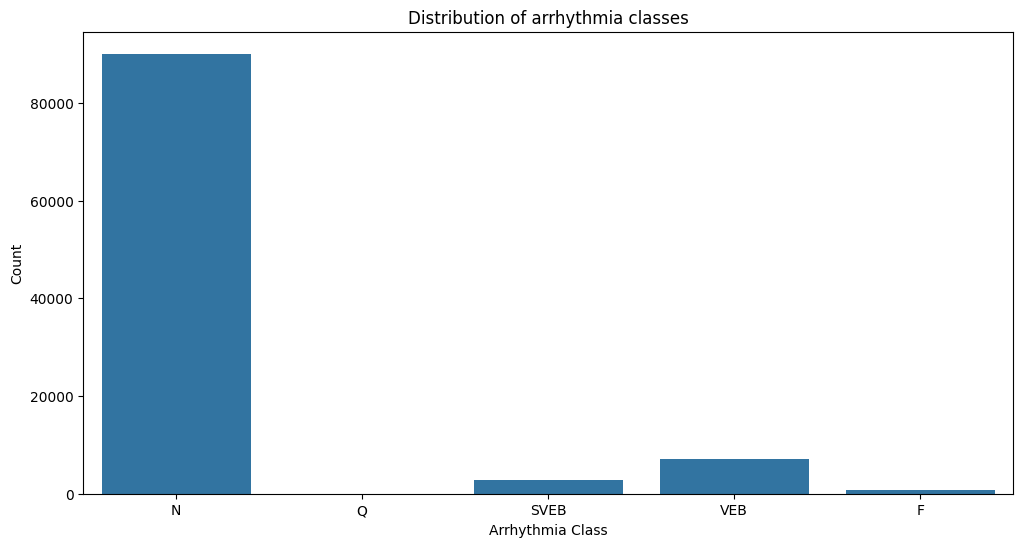

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df["type"])
plt.title("Distribution of arrhythmia classes")
plt.xlabel("Arrhythmia Class")
plt.ylabel("Count")

as we see in the perivious distribution of arrhythmia classes, we have a class imbalance problem. The distribution of arrhythmia classes is as follows:

In [9]:
# label Encodeing
le = LabelEncoder()
df["type_endcoded"] = le.fit_transform(df["type"])

In [10]:
df.head()

,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4,type_endcoded
0,101,N,76,313.0,0.074347,-0.160548,1.036401,-0.285662,-0.026824,41,...,2,18,22,2,0.025930,0.025930,0.025930,0.025436,0.025436,1
1,101,N,313,315.0,-0.052079,-0.264784,0.886597,-0.366298,-0.059710,21,...,26,27,62,9,-0.042009,-0.029498,0.005012,0.030892,0.002986,1
2,101,N,315,321.0,-0.062151,-0.296983,0.991859,-0.410306,-0.065686,22,...,3,8,12,1,0.009528,0.009528,0.008786,0.008786,0.008368,1
3,101,N,321,336.0,-0.063322,-0.281386,1.034903,-0.403880,-0.071750,22,...,6,9,16,1,-0.020536,-0.020257,-0.018965,-0.016968,-0.014555,1
4,101,N,336,344.0,-0.062915,1.046914,1.046408,1.046408,-0.074639,11,...,16,5,31,10,0.016053,0.006742,0.002782,-0.007798,-0.051155,1


In [11]:
df["type_endcoded"].nunique()

5

## Feature Engineering

In [12]:
# sparate beat 0 and beat 1 features
beat0_cols = [col for col in df.columns if col.startswith("0_")]
beat1_cols = [col for col in df.columns if col.startswith("1_")]

In [13]:
#create other features derived form thses columsn
df['rr_ratio'] = df['0_post-RR'] / df['0_pre-RR']  # Heart rate variability
df['qt_corrected'] = df['0_qt_interval'] / np.sqrt(df['0_post-RR'])  # QTc
df['beat_consistency'] = abs(df['0_qrs_interval'] - df['1_qrs_interval']) # Beat-to-beat variation

## Handling Missing Data & outliers

In [38]:
missing_summary = df.isnull().sum()
print("Missing Values per column: ")
print(missing_summary[missing_summary > 0])

Missing Values per column: 
Series([], dtype: int64)


with the pervious results, we can the quility of the data is excellent, we have no missing values in the data.

In [14]:
#handling the outliers
def detect_outliers(df, columns):
    outlier_indices = set()
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outlier_indices.update(df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)].index)
    return outlier_indices

key_intervals = ['0_qrs_interval', '0_qt_interval', '0_pq_interval', '0_pre-RR', '0_post-RR']
outliers = detect_outliers(df, key_intervals)

In [15]:
print(outliers)

{0, 65560, 65561, 65562, 65563, 65564, 65565, 65566, 65584, 65587, 65588, 65623, 65624, 65625, 65626, 65628, 65629, 65653, 65654, 65655, 65656, 65657, 65658, 65659, 65660, 65661, 65662, 65663, 131, 65673, 65674, 65675, 65676, 65678, 65679, 65681, 32914, 32915, 32916, 32917, 32918, 32919, 32920, 32921, 32922, 32923, 32924, 32925, 32926, 32927, 32928, 32929, 32930, 65698, 32932, 65699, 32934, 32931, 32936, 32933, 32938, 32935, 32940, 32937, 32942, 32939, 32944, 32945, 32946, 32941, 32948, 32943, 65718, 65719, 32952, 32953, 32954, 65722, 32947, 32957, 32958, 65720, 65721, 32961, 32962, 65731, 65732, 65733, 32966, 65734, 65735, 65736, 65729, 65730, 32974, 207, 32976, 65746, 32979, 32980, 32981, 32982, 65747, 65748, 65749, 32986, 32987, 32988, 65752, 65751, 65759, 65758, 65761, 65762, 65760, 32996, 65766, 65777, 65778, 65780, 65781, 98552, 65786, 33033, 33035, 33037, 33038, 65807, 65808, 65809, 65806, 65811, 65812, 33045, 33044, 65815, 33046, 65817, 65818, 33051, 33050, 65821, 33052, 65814,

## Feature Scaling and NOrmalization

In [ ]:
#pick the numerical values
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
if "type_endcoded" in numerical_features:
    numerical_features.remove("type_endcoded")

if "record" in numerical_features:
    numerical_features.remove("record")


In [24]:
print(numerical_features)

['0_pre-RR', '0_post-RR', '0_pPeak', '0_tPeak', '0_rPeak', '0_sPeak', '0_qPeak', '0_qrs_interval', '0_pq_interval', '0_qt_interval', '0_st_interval', '0_qrs_morph0', '0_qrs_morph1', '0_qrs_morph2', '0_qrs_morph3', '0_qrs_morph4', '1_pre-RR', '1_post-RR', '1_pPeak', '1_tPeak', '1_rPeak', '1_sPeak', '1_qPeak', '1_qrs_interval', '1_pq_interval', '1_qt_interval', '1_st_interval', '1_qrs_morph0', '1_qrs_morph1', '1_qrs_morph2', '1_qrs_morph3', '1_qrs_morph4', 'rr_ratio', 'qt_corrected', 'beat_consistency']


In [26]:
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numerical_features] = scaler.fit_transform(df[numerical_features])

In [ ]:
df_scaled.head()

,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4,type_endcoded,rr_ratio,qt_corrected,beat_consistency
0,101,N,-2.483072,0.424185,0.145598,-0.720135,-0.029284,-0.147226,0.335957,0.843318,...,-1.361295,0.776167,0.752312,0.646163,0.539843,0.670589,1,7.190829,0.019462,1.106198
1,101,N,0.410169,0.448838,-0.603426,-0.861019,-0.271881,-0.225696,0.162353,-0.487556,...,-0.593652,0.624329,0.631011,0.605784,0.549036,0.632206,1,-0.100336,-0.713269,-1.007156
2,101,N,0.434585,0.522798,-0.663101,-0.904537,-0.101417,-0.268523,0.130807,-0.421013,...,-1.470958,0.739510,0.716418,0.613068,0.511784,0.641409,1,-0.070680,-0.741962,-0.136952
3,101,N,0.507832,0.707699,-0.670036,-0.883457,-0.031711,-0.262270,0.098799,-0.421013,...,-1.470958,0.672319,0.651234,0.559499,0.468386,0.602217,1,-0.005825,-0.736389,-0.323424
4,101,N,0.690948,0.806313,-0.667625,0.911845,-0.013080,1.149086,0.083548,-1.152994,...,-0.483989,0.754091,0.710319,0.601478,0.483838,0.539644,1,-0.059523,-1.103551,-1.007156


In [29]:
df = df_scaled

## Splitting the data

In [30]:
X = df[numerical_features]
y = df["type_endcoded"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Handling Class Imbalance
We will use SMOTE (Synthetic Minority Over-sampling Technique) to handle the class imbalance problem
by generating synthetic samples for the minority classes.

In [32]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

NameError: name 'SMOTE' is not defined

In [ ]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_res, y_train_res)